### 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 불러오기

In [2]:
data = pd.read_csv("../Module03_머신러닝/membership.csv")
print(data.shape)
data.head()

(8807, 15)


,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


In [3]:
data.columns = ['id', 'term', 'fee', 'married', 'gender', 'income', 'job',
'package', 'age', 'family', 'payment', 'agent', 'target', 'start_date', 'end_date']

### 결측값 제거

In [4]:
# end_date 열 삭제
data = data.drop(['end_date'], axis=1)

In [5]:
# 결측치가 있는 행 제거
data.dropna(how='any')

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313
6,6,17,103016.16,S,M,999996.0,2.0,TYPE-A,35,0,MONTHLY,348099,0,20130930
9,9,12,300002.40,M,M,349992.0,1.0,TYPE-B,46,2,MONTHLY,1360477,1,20121130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,8801,12,100000.00,M,M,300000.0,2.0,TYPE-B,37,2,ANNUAL,1296622,1,20120806
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127


### 평균값 대체

In [6]:
# 결측치를 직업별 평균값으로 대체
data['income'] = data['income'].fillna(data.groupby('job')['income'].transform('mean'))
data['income'].isnull().sum() # 직업 결측치가 있기 때문에 결측치 16개 발생

16

In [7]:
# 결측치를 평균값으로 대체
data['income'] = data['income'].fillna(data['income'].mean()) # 따라서 전체 평균값으로 대체
data['income'].isnull().sum()

0

In [8]:
data['income_log'] = np.log1p(data['income'])
data.head()
# start_date : 날짜로 인식할수 있게 to_datetime 으로 변환하거나 가입 후 지난 날짜를 계산한 변수로 변경

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,income_log
0,0,22,100000.00,M,M,450000.000000,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,13.017005
1,1,88,149029.58,NaN,M,544756.571429,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,13.208096
2,2,93,102999.94,NaN,M,600000.000000,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,13.304687
3,3,17,147576.48,M,F,450000.000000,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,13.017005
4,4,39,100000.00,M,M,600000.000000,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,13.304687


### 최빈값 대체

In [9]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['married'] = data['married'].fillna(data['married'].mode()[0])

data.isnull().sum()

id             0
term           0
fee            0
married        0
gender         0
income         0
job           34
package        0
age            0
family         0
payment        0
agent          0
target         0
start_date     0
income_log     0
dtype: int64

In [10]:
data['isna_job'] = data['job'].isnull()
data['job'] = data['job'].fillna('etc')

# data = data.dropna(subset=['job'], how='any')
data.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
target        0
start_date    0
income_log    0
isna_job      0
dtype: int64

### Label Encoding

In [11]:
# 숫자형 변수
numeric_features = []
for col in data.columns:
    if data[col].dtype != 'object':
        numeric_features.append(col)
        
numeric_features        

['id',
 'term',
 'fee',
 'income',
 'age',
 'family',
 'target',
 'start_date',
 'income_log',
 'isna_job']

In [12]:
# 범주형 변수
categorical_features = []
for col in data.columns:
    if data[col].dtype == 'O':
        categorical_features.append(col)
        
categorical_features

['married', 'gender', 'job', 'package', 'payment', 'agent']

In [13]:
# 범주형 변수 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:

    data[col] = data[col].astype(str).astype('category')
    data[col] = le.fit_transform(data[col])

data.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,income_log,isna_job
0,0,22,100000.00,1,1,450000.000000,0,1,27,1,0,3055,0,20091029,13.017005,False
1,1,88,149029.58,1,1,544756.571429,5,0,75,0,0,1078,0,20131014,13.208096,False
2,2,93,102999.94,1,1,600000.000000,0,0,49,0,0,1460,0,20130531,13.304687,False
3,3,17,147576.48,1,0,450000.000000,0,0,47,3,1,2204,0,20130331,13.017005,False
4,4,39,100000.00,1,1,600000.000000,0,1,36,3,0,494,0,20080313,13.304687,False


### Feature 선택

In [14]:
selected_features = ['term', 'fee', 'married', 'gender', 'job', 'package',
       'age', 'family', 'payment', 'income_log', 'isna_job']

X = data.loc[:, selected_features].copy()
y = data.loc[:, 'target'].copy()

print(X.shape, y.shape)

(8807, 11) (8807,)


### Train-Test 데이터셋 분할

In [15]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (7045, 11) (7045,)
검증 데이터셋:  (1762, 11) (1762,)


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_tr, y_tr)

LogisticRegression()

### 랜덤 포레스트 

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_tr, y_tr)

val_pred = rf.predict(X_val)

In [18]:
# 특성 중요도 출력
features = pd.DataFrame(rf.feature_importances_, 
                        index=X_tr.columns, 
                        columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)

features

,Importance
age,0.239232
income_log,0.219620
fee,0.174611
term,0.149155
family,0.063608
payment,0.046877
package,0.034505
job,0.032386
gender,0.025267
married,0.013733


### 모델 성능 개선하기

### 변수 선택 
Feature Importance 분석에 따라, 가장 낮은 married, isna_job 열을 제외하고 분석

In [19]:
selected_features = ['term', 'fee', 'job', 'package', 'age', 'family', 'payment', 'income_log']
X_tr_selected = X_tr.loc[:, selected_features].copy()
X_val_selected = X_val.loc[:, selected_features].copy()

### 모델 파라미터 변경

In [20]:
model = RandomForestClassifier(
    n_estimators=100, # 100개의 Decision Tree
      max_depth=3, 
      class_weight='balanced', 
      random_state=42,
      )

model.fit(X_tr_selected, y_tr)
val_pred = model.predict(X_val_selected)

In [21]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_tr_selected)
X_val_scaled = scaler.fit_transform(X_val_selected)

### XGBoost

In [22]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=1000, 
    max_depth=2, 
    subsample=0.7,          # 전체 데이터 중 subsampling 할 비율
    colsample_bytree=0.8,   # tree 구성할 때 sampling 할 열의 비율
    reg_alpha=3,            # 규제의 강도 조절 (과적합이 있을 때)
    reg_lambda=0.2,         
    scale_pos_weight=2.5,   # scale_pos_weight = total_majority_examples / total_minority_examples
                            # 값을 올릴 수록 recall 이 올라간다. precision 은 내려간다. 클래스 0인것들을 클래스 1로 예측해서 얻어걸리게 만든다.
    random_state=42,
    )

xgb_model.fit(X_tr_scaled, y_tr)
val_pred = xgb_model.predict(X_val_scaled)

### LightGBM

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    n_estimators=100, 
    max_depth=None, 
    # num_leaves=
    subsample=0.7, 
    colsample_bytree=0.8, 
    reg_alpha=3, 
    reg_lambda=0.2,
    scale_pos_weight=2.5,   # scale_pos_weight = total_majority_examples / total_minority_examples
    random_state=42,
    )

lgb_model.fit(X_tr_scaled, y_tr)
val_pred = lgb_model.predict(X_val_scaled)

### Shap 분석

In [24]:
import shap
explainer = shap.TreeExplainer(xgb_model) # 모델을 shap value 계산을 위한 TreeExplainer로 변환
shap_values = explainer.shap_values(X_val_scaled)    # Shap Values 계산

In [25]:
# graph 초기화
shap.initjs() 

In [26]:
explainer.expected_value

0.37975103

In [27]:
# 첫 번째 샘플의 Shap Value
shap.force_plot(explainer.expected_value, shap_values[0,:], X_val_scaled[0,:])

In [28]:
# Shap Force Plot 출력 (전체 데이터셋)
shap.force_plot(explainer.expected_value, shap_values, X_val_scaled) 

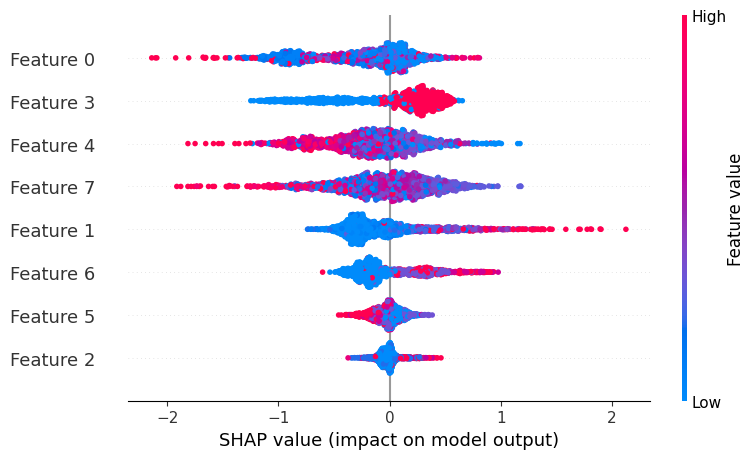

In [29]:
# Shap Summary Plot
shap.summary_plot(shap_values, X_val_scaled)

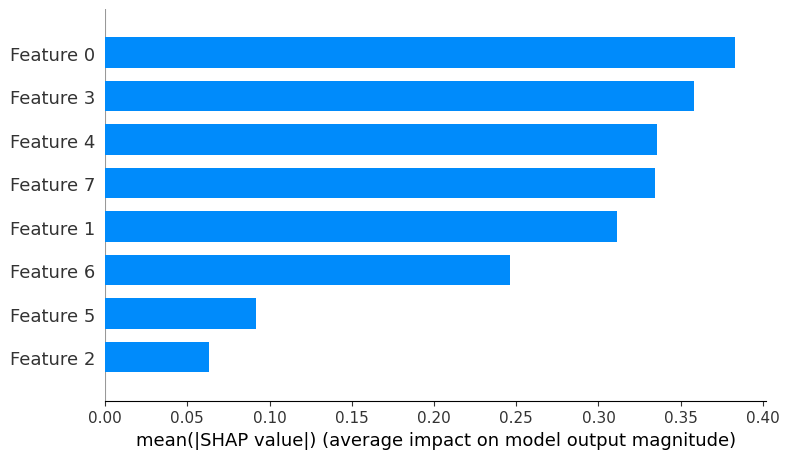

In [30]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_val_scaled, plot_type = "bar")